<a href="https://colab.research.google.com/github/juandata-git/ejerciciosBIT-Juanleguizamon/blob/main/prueba_de_hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chisquare
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
publicidades_compras = pd.DataFrame({
    'tipo_publicidad': np.random.choice(["Buena","Mala","Regular"], 100, p=[0.4, 0.2, 0.4]),
    'compra': np.random.choice(["Si","No"], 100, p=[0.5, 0.5]),
})

In [6]:
display(publicidades_compras["tipo_publicidad"].value_counts().sort_index(ascending=False))
display(publicidades_compras["compra"].value_counts().sort_index(ascending=False))

,count
tipo_publicidad,
Regular,40
Mala,20
Buena,40


,count
compra,
Si,50
No,50


In [7]:
publicidades_compras_conteos = pd.crosstab(publicidades_compras['tipo_publicidad'], publicidades_compras['compra'])
publicidades_compras_conteos

compra,No,Si
tipo_publicidad,,
Buena,21,19
Mala,9,11
Regular,20,20


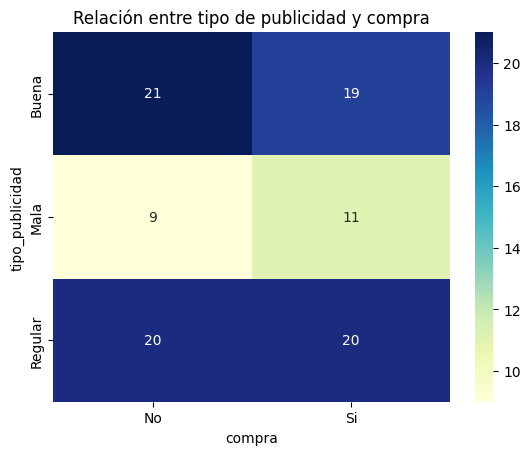

In [10]:
sns.heatmap(publicidades_compras_conteos, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Relación entre tipo de publicidad y compra')
plt.show()

In [12]:
# Prueba Chi² de independencia
chi2, p, dof, expected = chi2_contingency(publicidades_compras_conteos)
print(f"Estadístico Chi²: {chi2:.4f}")
print(f"Valor p: {p:.4f}")

if p < 0.05:
    print("➡ Hay evidencia estadística de que el tipo de publicidad está relacionado con la decisión de compra.")
else:
    print("➡ No hay evidencia suficiente para afirmar que la decisión de compra depende del tipo de publicidad.")

Estadístico Chi²: 0.3000
Valor p: 0.8607
➡ No hay evidencia suficiente para afirmar que la decisión de compra depende del tipo de publicidad.


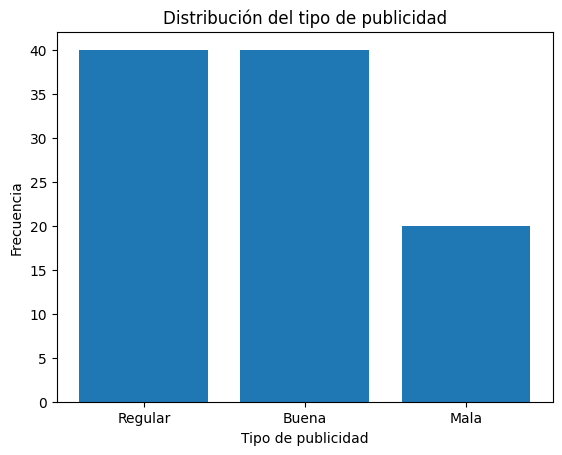

In [13]:
plt.bar(
    publicidades_compras['tipo_publicidad'].value_counts().index,
    publicidades_compras['tipo_publicidad'].value_counts().values
)
plt.title('Distribución del tipo de publicidad')
plt.xlabel('Tipo de publicidad')
plt.ylabel('Frecuencia')
plt.show()


In [14]:
from scipy.stats import chisquare

# Conteo observado de tipo_publicidad
observado = publicidades_compras['tipo_publicidad'].value_counts().sort_index()

# Esperamos distribución pareja (uniforme entre 3 categorías)
esperado = [len(publicidades_compras)/len(observado)] * len(observado)

# Prueba de bondad de ajuste
test = chisquare(f_obs=observado, f_exp=esperado)

print("--- Prueba de bondad de ajuste (Chi² tipo 3) ---")
print(f"Chi²: {test.statistic:.4f}")
print(f"Valor p: {test.pvalue:.4f}")

if test.pvalue < 0.05:
    print("➡ La distribución observada de tipo de publicidad difiere de lo esperado.")
    print("## Esto podría causar un sesgo en el modelo de predicción.")
else:
    print("➡ No hay diferencia significativa en la distribución de tipo de publicidad.")
    print("### No se espera un sesgo en el modelo de predicción.")

--- Prueba de bondad de ajuste (Chi² tipo 3) ---
Chi²: 8.0000
Valor p: 0.0183
➡ La distribución observada de tipo de publicidad difiere de lo esperado.
## Esto podría causar un sesgo en el modelo de predicción.
